<a href="https://colab.research.google.com/github/yokoanzai/Projects/blob/main/Daily_Show_Guests_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
%matplotlib inline

In [ ]:
#better for statistical plot types
import seaborn as sns

In [ ]:
data= pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv')


In [ ]:
data.head()

,YEAR,GoogleKnowlege_Occupation,Show,Group,Raw_Guest_List
0,1999,actor,1/11/99,Acting,Michael J. Fox
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard
2,1999,television actress,1/13/99,Acting,Tracey Ullman
3,1999,film actress,1/14/99,Acting,Gillian Anderson
4,1999,actor,1/18/99,Acting,David Alan Grier


In [ ]:
#rename columns to make it easier to write
data.rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'}, inplace=True)
data.columns

Index(['Year', 'GoogleKnowlege_Occupation', 'Show', 'Group', 'Guest'], dtype='object')

In [ ]:
#group the occupations to plot
def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
data['Occupation'] = data['Group'].apply(get_occupation)

In [ ]:
data.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


In [ ]:
table = pd.crosstab(data.Year, data.Occupation, normalize='index')*100

In [ ]:
table.head()

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,90.361446,1.204819,6.626506,1.807229
2000,73.964497,8.284024,12.426036,5.325444
2001,72.611465,3.821656,19.745223,3.821656
2002,62.264151,6.918239,26.415094,4.402516
2003,56.024096,10.240964,24.698795,9.036145


In [ ]:
table = table.drop(columns=['Other'])

In [ ]:
table.head()

Occupation,"Acting, Comedy & Music",Government and Politics,Media
Year,,,
1999,90.361446,1.204819,6.626506
2000,73.964497,8.284024,12.426036
2001,72.611465,3.821656,19.745223
2002,62.264151,6.918239,26.415094
2003,56.024096,10.240964,24.698795


In [ ]:
year = table.index.tolist()

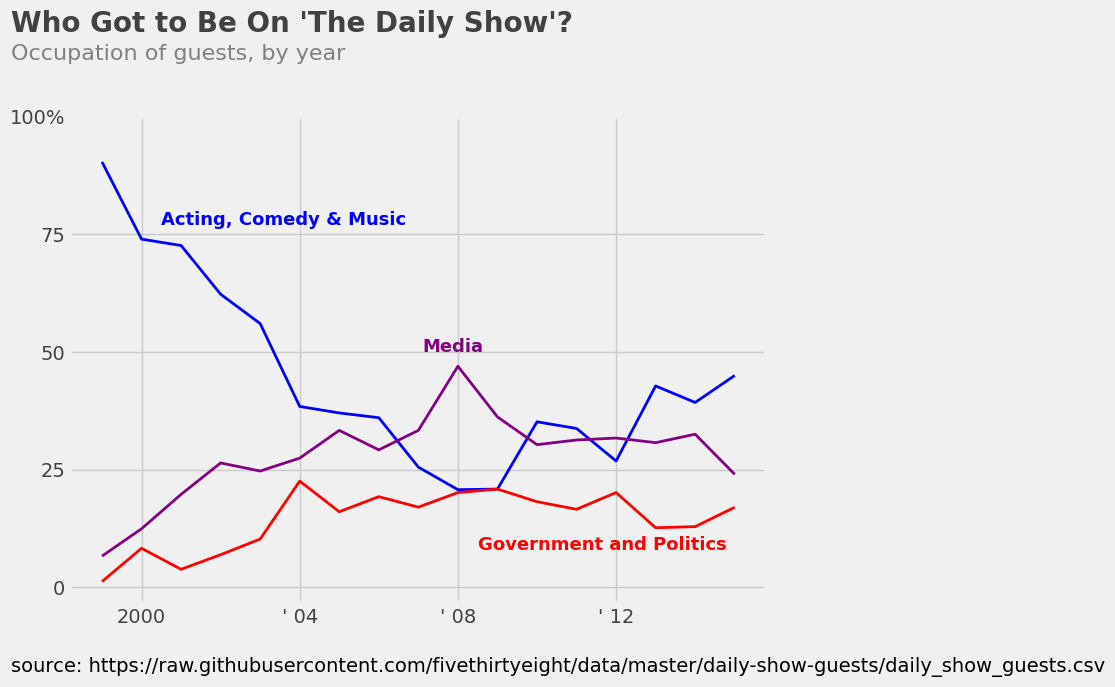

In [ ]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(8,6))

ax1 = sns.lineplot(x=year, y=table['Acting, Comedy & Music'].tolist(), lw=2.0, color='blue')
ax2 = sns.lineplot(x=year, y=table['Government and Politics'].tolist(), lw=2.0, color='red')
ax3 = sns.lineplot(x=year, y=table['Media'].tolist(), lw=2.0,color='purple')

# change y labels
ax.set_yticks([0, 25, 50, 75, 100])
ax.set_yticklabels(labels=['0', '25', '50', '75', '100%'], fontsize=14, color='#414141')

# change x labels
ax.set_xticks([2000, 2004, 2008, 2012])
ax.set_xticklabels(['2000', "' 04", "' 08", "' 12"], fontsize=14, color='#414141')

# Title text
ax.text(x=1996.7, y=118, s="Who Got to Be On 'The Daily Show'?", fontsize=20, fontweight='semibold', color='#414141')

# Subtitle text
ax.text(x=1996.7, y=112, s='Occupation of guests, by year', fontsize=16, color='gray')

# Text labels for each line
ax.text(x=2000.5, y=77, s="Acting, Comedy & Music", fontsize=13, fontweight='semibold', color='blue')
ax.text(x=2007.1, y=50, s="Media", fontsize=13, fontweight='semibold', color='purple')
ax.text(x=2008.5, y=8, s="Government and Politics", fontsize=13, fontweight='semibold', color='red')

#signature line
ax1.text(x = 1996.7, y = -18, s = 'source: https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv',
fontsize = 14, color = 'black');